# Income Classification

For this project it was examined the 'adult' dataset with the aim of predicting whether an individual's income will be greater
than $50,000 per year. 
The "adult" data was cleaned and prepared, performed exploratory data analisys and applied K-Means clustering. Then were built 
two classification models, a Logistic Regression classifier and a Random Forest classifier. After training and testing the 
models, were computed classification statistics such as Confusion Matrix and ROC analysis for evaluating them. The evaluation
metrics were presented and commented for each individual model, then compared regarding the overall accuracy and performance.

## Dataset description

The 'adult' dataset contains 32561 observations and 15 attributes. Each entry contains information about an individual, 
including the income. The dataset is located at UC Irvine Machine Learning Repository:
"https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data".
    
**Attribute information:**
  
- age: the age of a person
- fnlwgt: final weight, represents the "weighted tallies" of socio-economic characteristics of the population
- education-num: contains the codes for different education categories
- capital-gain: capital-gains for a person
- capital-loss: capital-loss for a person
- hours-per-week: the hours a person has reported to work per week
- income: weather a person makes less or more than 50K anually
- workclass: represents the employment class of a person
- education: the highest level of education achieved by a person
- marital-status: the marital status of a person
- occupation: the general type of occupation of an individual
- relationship: represents what an individual is relative to others
- race: description of a person's race
- sex: the gender of the individual
- native-country: contry of origin for a person

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import *
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from matplotlib import cm

%matplotlib inline

## Load data

In [2]:
# Read in dataset as pandas data frame

# Create a dataframe using adult dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
adult = pd.read_csv(url, header=None)

# Assign column names from documentation at: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
adult.columns = ["age", "workclass", "fnlwgt", "education", "education-num",
                 "marital-status", "occupation", "relationship", "race", 
                 "sex", "capital-gain", "capital-loss", "hours-per-week", 
                 "native-country", "income"]

# Check the size of the dataframe and display the first few rows
print(adult.shape)
adult.head()
#adult.tail()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Next we check the datatypes of the columns and the summary statistics.

In [3]:
# Check the datatypes of the columns
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [4]:
# Display summary statistics
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observations regarding the dataset based on datatypes and summary statistics:
    
- There are 9 categorical and 6 numerical attributes in the adult dataset. The numerical columns are of type integer (int64)
and the categorical columns are of object type. 
- Some of the categorical columns contain multiple categories. Before building the classification models, we need to 
consolidate the categories in those columns.
- The column "age" has a range between 17 and 90 with a median value of 37. The variable "hours-per-week" has a minnimum of 1
and a maximum of 99. The values in these columns need to be binned in specific buckets.
- For both "capital-gain" and "capital-loss" attributes, the values for minimum, first and third quartiles is zero. The 
maximum values are very large.
- For the "hours-per-week" attribute the mean and median are equal with a value of 40.

## Data Cleaning and Preparation

Before exploring the variables and building the classification model, the data was cleaned and prepared as mentioned below:
   
- Find and impute missing values
- Replace outliers
- Bin categorical variables
- Normalize numeric variables
- Consolidate categories
- Remove obsolete columns
- Replace classes in target variable
- One-hot encoding
- Apply K-Means clustering and add the cluster labels to dataset

### Find and impute missing values

Some of the categorical columns in 'adult' dataframe contain missing values marked with " ?". Below it is checked which 
columns contain missing values and the count for each column. 

In [ ]:
# Check if there are missing value
#(adult.astype(np.object) == " ?").any()

# Get the number of missing values in each column
#Empty = adult.loc[:, :] == " ?"
#Empty.sum()

# Check the categories in the columns with missing values

# List with columns with missing values
#cols_missing = ['workclass', 'occupation', 'native-country']

# Loop through the list and display the categories for each variable
#for col in cols_missing:
#    print(col, "\n", adult.loc[:, col].value_counts(), "\n")

It can be observed that there are missing values in the following columns: "workclass", "occupation" and "native-country". 
Variables "workclass" and "occupation" have 1843 missing values and "native-country" has 583.
Using value_counts() it is checked the frequency table for each variable and observed the most common category for each 
of them:
- variable "workclass": most common category is " Private"
- variable "occupation": most common category is " Prof-specialty"
- variable "native_country": most common category is " United-States"  
    
The columns with missing values are of categorical type, so we'll impute the missing values with the most common category 
in each column.

In [5]:
# Impute missing values for categorical column 'workclass'

# Specify the locations that have a missing value
MissingValue = adult.loc[:, "workclass"] == ' ?'
# Impute missing values using the most common category "Private"
adult.loc[MissingValue, "workclass"] = " Private"

# Impute missing values for categorical column 'occupation'

# Specify the locations that have a missing value
MissingValue = adult.loc[:, "occupation"] == ' ?'
# Impute missing values using the most common category "Prof-specialty"
adult.loc[MissingValue, "occupation"] = " Prof-specialty"

# Impute missing values for categorical column 'native-country'

# Specify the locations that have a missing value
MissingValue = adult.loc[:, "native-country"] == ' ?'
# Impute missing values using the most common category "United-States"
adult.loc[MissingValue, "native-country"] = " United-States"

# Check again the categories
#for col in cols_missing:
#    print(col, "\n", adult.loc[:, col].value_counts(), "\n")

After re-checking the frequency tables, we can see that there are no more missing values.

### Replace outliers

The summary statistics and the histograms for continuos variables "capital_gain", "capital_loss" and "fnlwgt" suggest that they
may have outliers. 
The code below creates a Boolean flag for values that lie outside the limits of mean plus/minus two standard deviations, and 
replaces them with the mean of the non-outliers (values inside the limits of mean plus/minus two standard deviations). 

In [6]:
#plt.hist(adult['fnlwgt'])
#plt.hist(adult['capital-gain'])
#plt.hist(adult['capital-loss'])

# Create a list with columns containing outliers
cols = ["fnlwgt", "capital-gain", "capital-loss"]

# Loop through each column and replace outliers with the mean of non-outliers
for col in cols:
    # Calculate the upper and lower limits for values that are not outliers
    Lo = np.mean(adult.loc[:, col]) - 2*np.std(adult.loc[:, col])
    Hi = np.mean(adult.loc[:, col]) + 2*np.std(adult.loc[:, col])
    
    # Create a flag for values outside of limits
    FlagBad = (adult.loc[:, col] < Lo) | (adult.loc[:, col] > Hi)
    
    # FlagGood is the complement of FlagBad
    FlagGood = ~FlagBad
    
    # Replace outleiers with the mean of non-outliers
    adult.loc[FlagBad, col] = np.mean(adult.loc[FlagGood, col])

    
# Check again the histogram of each variable
#plt.hist(adult['fnlwgt'])
#plt.hist(adult['capital-gain'])
#plt.hist(adult['capital-loss'])

To gain insights about which features would be most helpful for building the classification model, we will analyse 
the distributions of different variables, mainly in relationship with the label.

# Exploratory Data Analysis

The education feature describes the highest level of education of each individual in the dataset. The distribution of different
levels are presented in the plot below, depending on the income.
It can be noted that most individuals in the dataset have a high school education, followed by people with some college and 
bachelors. Much lower frequencies present people with either Doctorate and Prof-school.
The levels "Masters", "Bachelors" and "Some-college" have the highest count of income over 50K.

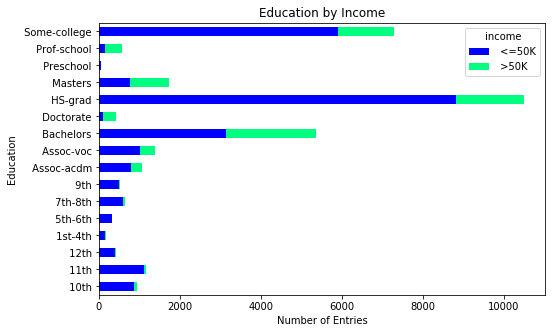

In [7]:
from matplotlib import cm

cmap = cm.get_cmap('winter')    

adult.groupby(['education', 'income']).size().unstack().plot(kind='barh', stacked=True, figsize=(8, 5), cmap=cmap, edgecolor='None')
plt.title('Education by Income')
plt.xlabel('Number of Entries')
plt.ylabel('Education')
plt.show()

The graph of workclass vs income shows that the majority of people work in the private sector. The highest frequency is for 
income less than 50K. Among the rest of other workclass categories, the chances of making more than 50K are lower, 
except for self-emp-inc and government.

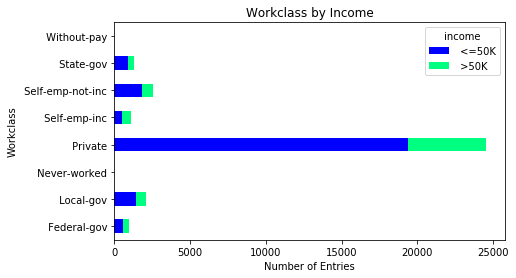

In [8]:
adult.groupby(['workclass', 'income']).size().unstack().plot(kind='barh', stacked=True, figsize=(7, 4), cmap=cmap, edgecolor='None')
plt.title('Workclass by Income')
plt.xlabel('Number of Entries')
plt.ylabel('Workclass')
plt.show()

The "Occupation by Income" plot below shows a somewhat uniform distribution of occupations in the dataset, except for the 
"Armed Forces" that has a very low count of values. For some occupations as Prof-specialty and Exec-managerial there is a 
high number of individuals that make over 50K. Others like Handlers-cleaners, Other-service and Farming-fishing have a 
significantly lower number of people with income higher than 50K.

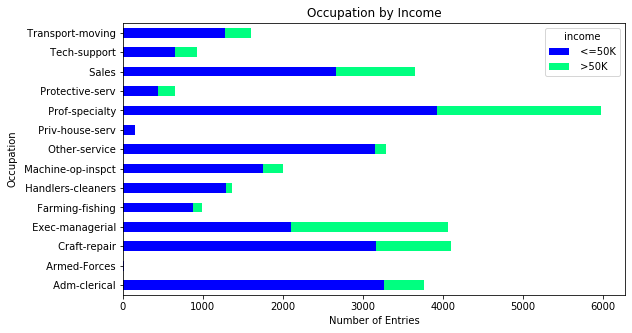

In [9]:
adult.groupby(['occupation', 'income']).size().unstack().plot(kind='barh', stacked=True, figsize=(9, 5), cmap=cmap, edgecolor='None')
plt.title('Occupation by Income')
plt.xlabel('Number of Entries')
plt.ylabel('Occupation')
plt.show()

The frequency count for male is much higher comparing with female in the distribution of gender by income. Also, for the male 
gender there is a higher distribution of income  higher than 50K.

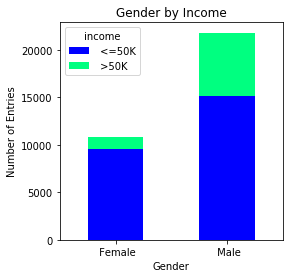

In [10]:
adult.groupby(['sex', 'income']).size().unstack().plot(kind='bar', stacked=True, figsize=(4,4 ), cmap=cmap, edgecolor='None')
plt.title('Gender by Income')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Number of Entries')
plt.show()

Most of the entries in the 'Race vs Income' plot are "white" followed by "black" and "asian". Income less than 50K has the 
highest percentage for all races.

In [ ]:
#adult.groupby(['race', 'income']).size().unstack().plot(kind='barh', stacked=True, figsize=(9, 5), cmap=cmap, edgecolor='None')
#plt.title('Race by Income')
#plt.xlabel('Number of Entries')
#plt.ylabel('Race')
#plt.show()

The EDA displayed some relationships between the variables and income which will be helpful in selecting the variables for 
predictive models.

### Binning variables

The discrete variables 'age' and 'hours-per-week' are binned in specific intervals (bins). From summary statistics we can 
observe that "age" has a minimum value of 17 and a maxim of 90, while the range for "hours-per-week" is between 1 and 99.
To select the number and limits of the bins are plotted the histograms for those variables. Then it is created a list for
the bins and a list for the bin labels. The variable is binned using the pandas function cut(). 

In [ ]:
# Plot the histogram of "age"
#plt.hist(adult['age'], bins=5, color='blue')
#plt.title("Histogram of age")

In [11]:
# Bin the variable "age"

# Create a list with bins limits
bins_age = [17, 25, 45, 65, 90]   
# Create a list with labels for the bins
age_categ = ['17_25', '25_45', '45_65', 'Over65']  
# Use pandas cut() function for binning
binAge = pd.cut(adult.loc[:, 'age'], bins_age, labels=age_categ)    
# Add the binned "age" to adult dataset
adult['age'] = binAge
# Check the counts for each bin
adult.loc[:, 'age'].value_counts()

# Display a bar plot of the bins for "age"
#adult.loc[:,"age"].value_counts().plot(kind='bar')
#plt.title("Bar plot binned age")

25_45     16523
45_65      8469
17_25      6016
Over65     1158
Name: age, dtype: int64

After binning, we can plot 'age' trying to get some insights of it's distribution by income.

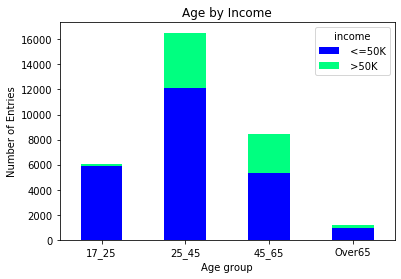

In [12]:
# Age (after binning) vs income

# Select a color map
cmap = cm.get_cmap('winter') 

# Plot age grouped by income
adult.groupby(['age', 'income']).size().unstack().plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap, edgecolor='None')
plt.title('Age by Income')
plt.xlabel('Age group')
plt.xticks(rotation=0)
plt.ylabel('Number of Entries')
plt.show()

The graph shows a significat amount of variance between the counts of individuals with income >50K and <=50K between different 
age groups. The highest count is for the group age 25-45. In this group the highest frequency is for income less than 50K, but 
there is still a good amount of people making over 50K. Next age group is between 45-65 with almost equal amount for both 
categories, unde and over 50K. For the groups between 17-25  and over 65 the income is mostly under 50K, with slim changes 
for income over 50K. 

Similarly we'll bin the variable "hours_per_week" and plot it's distribution vs income.

In [13]:
# Bin the variable "hours_per_week"

# Plot the histogram of "hours-per-week"
#plt.hist(adult["hours-per-week"])

# Create a list with bins limits
bins_hours = [1, 39, 40, 99]
# Create a list with labels for the bins
hours_categ = ['<40', '40', '>40']  # labels for 3 bins
# Use pandas cut() function for binning
binHours = pd.cut(adult['hours-per-week'], bins_hours, labels=hours_categ)
# Add binned "hours_per_week" to adult dataframe
adult.loc[:, 'hours-per-week'] = binHours
# Check the counts for each bin
adult.loc[:, 'hours-per-week'].value_counts()

# Display a bar plot of the bins for "hours-per-week"
#adult.loc[:,"hours-per-week"].value_counts().plot(kind='bar')
#plt.title("Bar plot binned hours-per-week")

40     15217
>40     9581
<40     7743
Name: hours-per-week, dtype: int64

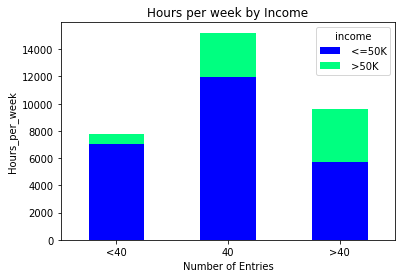

In [14]:
# Hours-per-week (after binning) vs income

cmap = cm.get_cmap('winter')

adult.groupby(['hours-per-week', 'income']).size().unstack().plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap, edgecolor='None')
plt.title('Hours per week by Income')
plt.xlabel('Number of Entries')
plt.xticks(rotation=0)
plt.ylabel('Hours_per_week')
plt.show()

The plot above shows that the majority of individuals work 40 hours per week. The percentage of individuals making over 50K
decreases sharp for less than 40 hours per week and increases significantly for more than 40 hours per week.

The dataset cleaning continues with normalization of the numeric variables.

### Normalize numeric variables

Before building a classification model algorithm, the numerical columns "fnlwgt", "capital-gain", "capital-loss" need to be 
normalized so the values are all in the same range. The values were normalized using the MinMax normalization which re-scales
the variables to the range of [0, 1].

In [15]:
# Create a dataframe with the colums to normalize
norm_cols = adult.loc[:, ["fnlwgt", "capital-gain", "capital-loss"]]
# Extract the values in X numpy array
X = norm_cols.values
# Create the scaler, then fit and transform the values in X
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Create a list with column names 
cols = ["fnlwgt", "capital-gain", "capital-loss"]
# Make a dataframe and give names to scaled columns
X_scaled = pd.DataFrame(X_scaled, columns=cols)         
#X_scaled.head()
# Replace the scaled columns in adult dataframe
adult['fnlwgt'] = X_scaled['fnlwgt']                   
adult['capital-gain'] = X_scaled['capital-gain']
adult['capital-loss'] = X_scaled['capital-loss']

# Check the first few rows
#adult.head()

### Drop redundant column

The "education-num" column contains codes corresponding to different education categories: for example 1 is " Preschool",
2 is " 1st-4th" etc. It can be observed that the categories are the same as in column "education", so "education-num" is
redundant. We will keep only "education" variable and drop the "education-num".

In [16]:
# Drop column "education-num"
adult = adult.drop("education-num", axis=1)

# Check that "education-num" is not anymore in the list of columns
#adult.columns

### Consolidate categories

The frequency table of categorical columns shows that some of them contain multiple categories. Some categories have high 
counts, while others have only a few.  For this reason, the categories in categorical columns are simplified by consolidating
the categories. To understand which are the main categories for a variable, were plotted bar plots. 
For example, the column "education" has 16 categories with highest frequency count represented by HS graduates, while some of 
other categories have only several counts. These categories were consolidated as follows: "Preschool" to "11th" were 
consolidated under "12th", and the rest of categories under "Some-college".

It was apllied a similar approach for other categorical columns:
- workclass: the bar plot distribution shows the highest frequency count for Private sector and much lower values for
Government and Self-employee
- marital-status: the plot counts shows the highest category for 'Married-civ-spouse'
- occupation: the distribution shows similar counts for Profesional, Managerial and Sales categories, with 
lower values for Services or Manual labor
- relationship: the most common category is "Husband"
- race: the most common category is "White"
- sex: "Male" category has the highest value counts
- native-country: there are 41 countries from 3 continents, North-South America, Europe and Asia. USA has the highest count 
number among all countries.

In [17]:
# Consolidate categories in column 'education'

# Consolidate Preschool, 1st-4th, 5th-6th, 7th-8th, 9th, 10th and 11th
adult.loc[adult.loc[:, "education"] == " Preschool", "education"] = " 12th"
adult.loc[adult.loc[:, "education"] == " 1st-4th", "education"] = " 12th"
adult.loc[adult.loc[:, "education"] == " 5th-6th", "education"] = " 12th"
adult.loc[adult.loc[:, "education"] == " 7th-8th", "education"] = " 12th"
adult.loc[adult.loc[:, "education"] == " 9th", "education"] = " 12th"
adult.loc[adult.loc[:, "education"] == " 10th", "education"] = " 12th"
adult.loc[adult.loc[:, "education"] == " 11th", "education"] = " 12th"
# Consolidate the rest of categories under Some-college (except HS-grad)
adult.loc[adult.loc[:, "education"] == " Assoc-voc", "education"] = " Some-college"
adult.loc[adult.loc[:, "education"] == " Assoc-acdm", "education"] = " Some-college"
adult.loc[adult.loc[:, "education"] == " Bachelors", "education"] = " Some-college"
adult.loc[adult.loc[:, "education"] == " Masters", "education"] = " Some-college"
adult.loc[adult.loc[:, "education"] == " Prof-school", "education"] = " Some-college"
adult.loc[adult.loc[:, "education"] == " Doctorate", "education"] = " Some-college"

# Consolidate categories in column 'workclass'

# Consolidate 'State-gov' and 'Federal-gov'
adult.loc[adult.loc[:, "workclass"] == " State-gov", "workclass"] = " Local-gov"
adult.loc[adult.loc[:, "workclass"] == " Federal-gov", "workclass"] = " Local-gov"
# Consolidate 'Self-emp-inc', 'Without-pay' and 'Never-worked'
adult.loc[adult.loc[:, "workclass"] == " Self-emp-inc", "workclass"] = " Self-emp-not-inc" 
adult.loc[adult.loc[:, "workclass"] == " Without-pay", "workclass"] = " Self-emp-not-inc" 
adult.loc[adult.loc[:, "workclass"] == " Never-worked", "workclass"] = " Self-emp-not-inc" 

# Consolidate categories in column 'marital-status' 

# Consolidate Married-spouse-absent and Married-AF-spouse
adult.loc[adult.loc[:, "marital-status"] == " Married-spouse-absent", "marital-status"] = " Married-civ-spouse"
adult.loc[adult.loc[:, "marital-status"] == " Married-AF-spouse", "marital-status"] = " Married-civ-spouse"
# Consolidate Separated
adult.loc[adult.loc[:, "marital-status"] == " Separated", "marital-status"] = " Divorced"

# Consolidate categories in column 'occupation' 

# Consolidate category Exec-managerial
adult.loc[adult.loc[:, "occupation"] == " Exec-managerial", "occupation"] = " Prof-specialty"
# Consolidate Adm-clerical, Tech-support, Other-service, Protective-serv, Priv-house-serv
adult.loc[adult.loc[:, "occupation"] == " Adm-clerical", "occupation"] = " Sales"
adult.loc[adult.loc[:, "occupation"] == " Tech-support", "occupation"] = " Sales"
adult.loc[adult.loc[:, "occupation"] == " Other-service", "occupation"] = " Sales"
adult.loc[adult.loc[:, "occupation"] == " Protective-serv", "occupation"] = " Sales"
adult.loc[adult.loc[:, "occupation"] == " Priv-house-serv", "occupation"] = " Sales"
# Consolidate Machine-op-inspct, Transport-moving, Handlers-cleaners, 
# Farming-fishing, Armed-Forces
adult.loc[adult.loc[:, "occupation"] == " Machine-op-inspct", "occupation"] = " Craft-repair"
adult.loc[adult.loc[:, "occupation"] == " Transport-moving", "occupation"] = " Craft-repair"
adult.loc[adult.loc[:, "occupation"] == " Handlers-cleaners", "occupation"] = " Craft-repair"
adult.loc[adult.loc[:, "occupation"] == " Farming-fishing", "occupation"] = " Craft-repair"
adult.loc[adult.loc[:, "occupation"] == " Armed-Forces", "occupation"] = " Craft-repair"

# Consolidate categories in column 'relationship' 

# Consolidate category Wife
adult.loc[adult.loc[:, "relationship"] == " Wife", "relationship"] = " Husband"
# Consolidate Other-relative
adult.loc[adult.loc[:, "relationship"] == " Other-relative", "relationship"] = " Not-in-family"

# Consolidate categories in column 'native-country' by continents

# Consolidate countries in North/South America
adult.loc[adult.loc[:, "native-country"] == " Canada", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " Mexico", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " Cuba", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " Dominican-Republic", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " El-Salvador", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " Puerto-Rico", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " Guatemala", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " Haiti", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " Honduras", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " Jamaica", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " Nicaragua", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " Trinadad&Tobago", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " Outlying-US(Guam-USVI-etc)", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " Columbia", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " Ecuador", "native-country"] = " United-States"
adult.loc[adult.loc[:, "native-country"] == " Peru", "native-country"] = " United-States"
# Consolidate countries in Europe
adult.loc[adult.loc[:, "native-country"] == " England", "native-country"] = " Germany"
adult.loc[adult.loc[:, "native-country"] == " Italy", "native-country"] = " Germany"
adult.loc[adult.loc[:, "native-country"] == " Poland", "native-country"] = " Germany"
adult.loc[adult.loc[:, "native-country"] == " Portugal", "native-country"] = " Germany"
adult.loc[adult.loc[:, "native-country"] == " Greece", "native-country"] = " Germany"
adult.loc[adult.loc[:, "native-country"] == " France", "native-country"] = " Germany"
adult.loc[adult.loc[:, "native-country"] == " Ireland", "native-country"] = " Germany"
adult.loc[adult.loc[:, "native-country"] == " Yugoslavia", "native-country"] = " Germany"
adult.loc[adult.loc[:, "native-country"] == " Hungary", "native-country"] = " Germany"
adult.loc[adult.loc[:, "native-country"] == " Scotland", "native-country"] = " Germany"
adult.loc[adult.loc[:, "native-country"] == " Holand-Netherlands", "native-country"] = " Germany"
# Consolidate countries in Asia
adult.loc[adult.loc[:, "native-country"] == " India", "native-country"] = " Japan"
adult.loc[adult.loc[:, "native-country"] == " Iran", "native-country"] = " Japan"
adult.loc[adult.loc[:, "native-country"] == " Cambodia", "native-country"] = " Japan"
adult.loc[adult.loc[:, "native-country"] == " Laos", "native-country"] = " Japan"
adult.loc[adult.loc[:, "native-country"] == " Thailand", "native-country"] = " Japan"
adult.loc[adult.loc[:, "native-country"] == " Vietnam", "native-country"] = " Japan"
adult.loc[adult.loc[:, "native-country"] == " Philippines", "native-country"] = " Japan"
adult.loc[adult.loc[:, "native-country"] == " China", "native-country"] = " Japan"
adult.loc[adult.loc[:, "native-country"] == " Hong", "native-country"] = " Japan"
adult.loc[adult.loc[:, "native-country"] == " South", "native-country"] = " Japan"
adult.loc[adult.loc[:, "native-country"] == " Taiwan", "native-country"] = " Japan"

Below are checked the categories after consolidating them.

In [ ]:
# Check the counts for consolidated categories in categorical columns

#categorical_columns = ["workclass", "education", "marital_status", "occupation","relationship", native_country"]

#for col in categorical_columns:
#    print(adult[:, col].value_counts())

### Replace classes in target variable

The frequency table for the target variable shows a slightly class imbalance of ~ 1:3 between the counts of income income less
than 50K and higher than 50K:

In [18]:
# Frequency count for target "income"
adult.loc[:, 'income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

Before building the classification model, we will replace the categories in the target with numeric values as follows:
- income = <=50K: class 0
- income >50K: class 1

In [19]:
# Replace the categorical values in target
adult["income"] = adult["income"].map({" <=50K": 0, " >50K": 1})

#adult.loc[:, 'income'].value_counts()

### One-hot encoding values

Next, the values in the adult dataframe will be one-hot encoded using the pandas get_dummies(). The function takes as arguments
the dataframe and the list of columns that will be hot encoded.

In [20]:
# Check the shape and few rows before one-hot encoding
#print(adult.shape)
#adult.head(3)

# Create a list with the columns for one-hot encoding
col_encode = ["age", "workclass", "education", "marital-status", "occupation", "relationship", "race", "sex",
             "hours-per-week", "native-country"]

# Create a new dataframe for the encoded values
adult_dummies = pd.get_dummies(adult, columns=col_encode)

# Check the shape and columns after one-hot encoding
print(adult_dummies.shape)
#adult_dummies.columns

(32561, 38)


### Apply K-Means

The data was also analyzed by performing K-Means clustering using several attributes. The number of clusters was set to two, 
with the intention of initial grouping the unlabeled data into two categories coresponding to people with an income higher 
then 50k and people with an income lower than 50k. The cluster labels were added to the dataset.

In [21]:
# Create a datframe with the columns to use for KMeans
X = adult_dummies.loc[:, ["fnlwgt", "capital-gain", "capital-loss", 
                  'age_17_25', 'age_25_45', 'age_45_65', 'age_Over65',
                  'education_ 12th', 'education_ HS-grad', 'education_ Some-college',
                  'occupation_ Craft-repair', 'occupation_ Prof-specialty', 'occupation_ Sales',
                  'sex_ Female', 'sex_ Male',
                  'hours-per-week_<40', 'hours-per-week_40', 'hours-per-week_>40', 
                  'native-country_ Germany', 'native-country_ Japan', 'native-country_ United-States']] 

# Build the model by calling K-Means from sklearn module, using two clusters
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm='auto')

# Labels returned by KMeans
Y = kmeans.fit_predict(X) 

# Cluster centroids returned by KMeans
#C = kmeans.cluster_centers_                     

# Add the cluster label to the dataset
adult_dummies['KMeans-Cluster'] = Y   

# Check the first few rows
#adult_dummies.head(3)

Next, the cleaned dataframe is saved as a csv file to be ready for use for building the machine learning models.

In [ ]:
# Save the cleaned dataframe as csv file
#adult_dummies.to_csv("adult_dummies.csv", sep=",", index=False)

## Build classification models

To build the calssification models, we need to create the label and the features datasets. Then, the dataset is split into 
training and testing sets. 
For splitting the dataset into training and testing sets it is used the "train_test_split" function from sklearn. Using a set 
for training the model and another set for testing it, avoids overfitting. The "train_test_split" function splits randomly the 
dataset using the "test_size" parameter. Based on the size of the dataset, the "test_size" was set to 0.2, which means that
80% of data is used for training and 20% for testing. The parameter "random_state", which controls the shuffling applied to 
data before the split, was set to "123".

In [22]:
# Create the label
y = adult_dummies.loc[:, "income"]

# Create the features
X = adult_dummies.drop("income", axis=1)

# Check the first rows in X
#X.head(3)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Print the shapes of the train and test sets
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (26048, 38)
y_train:  (26048,)
X_test:  (6513, 38)
y_test:  (6513,)


To predict whether a person will make an income over 50K a year, were built two binary classification models
which performed a two-class classification: a Logistic Regression classifier and a Random Forest classifier.

### Logistic Regression

The Logistic Regression classifier does not require high computation power and it has straightforward interpretability. It 
outputs well-calibrated probabilities along with classification results. The sklearn function used is LogisticRegression(). 
For training the model it is used a maxim number of iterations parameter (max_iter) of 1000.

In [23]:
# Create the logistic regression model
lr_clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# Get predictions for X_test
y_pred = lr_clf.predict(X_test)

Accuracy rate is used to evaluate the model's performance. Accuracy is calculated as the number of correct predictions divided 
by the total number of predictions. There are also other measures used to asses the model's performance which are relative to 
each class: Precision, Recall and F1-score.

In [24]:
# Determine Accuracy rate
AR = accuracy_score(y_pred, y_test)
print("Accuracy rate: ", np.round(AR, 2))

# Calculate Precision
P = precision_score(y_pred, y_test)
print("Precision: ", np.round(P, 2))
# Calculate Recall
R = recall_score(y_pred, y_test)
print("Recall: ", np.round(P, 2))
# Calculate F1 score
F1 = f1_score(y_test, y_pred)
print("F1 Score:", np.round(F1, 2))

Accuracy rate:  0.84
Precision:  0.57
Recall:  0.57
F1 Score: 0.64


The Logistic Regression model has a high Accuracy rate of 0.84, showing a good ratio between the number of correct predictions 
from the total number of predictions. The F1 score has a value of 0.64, which shows a good balance between Precision and Recall.

To further evaluate the model were used two other classification statistics, the Confusion Matrix and the ROC anlysis. 

In [25]:
# Determine Confusion Matrix
CM = confusion_matrix(y_pred, y_test)
tn, fp, fn, tp = CM.ravel()

print("Confusion Matrix \n", CM)
print("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)

Confusion Matrix 
 [[4569  678]
 [ 358  908]]

TP, TN, FP, FN: 908 , 4569 , 678 , 358


In the Confusion Matrix, the main diagonal shows high values for the True Positives and the True Negatives which is an indicator
that the classifier performs well. The values are calculated for the default probability threshold of 0.5.

To calculate ROC and AUC, we will get the probabilities using the predict_proba() function. Using probabilities we can 
calculate the False Positive Rate (fpr), True Positive Rate (tpr) and probability thresholds (th).

In [26]:
# Get the probabilities for class 1
BothProb = lr_clf.predict_proba(X_test)
probClass1 = BothProb[:, 1]  

# Calculate the fpr, tpr) and th using probablities
fpr1, tpr1, th1 = roc_curve(y_test, probClass1)

# Calculate AUC
AUC_LR = auc(fpr1, tpr1)
print("AUC score LR:", np.round(AUC_LR, 2))

AUC score LR: 0.89


The Area Under the Curve (AUC) for the Logistic Regression classifier has a high value of 0.89. 
The ROC curve is plotted below in green and it is close enough to the top left corner, showing how the True Positive Rate and 
the False Positive Rate relate to each other for all probability thresholds. 

### Random Forest classifier

The Random Forest classifier is a flexible and easy to use algorithm. It is considered a highly accurate and robust method 
because of the number of decision trees participating. These are called the estimators (each estimator is a decision tree). 
For the model it was selected a number of estimators of 100. The samples that are used for each split is defined by 'mss' 
parameter and has a value of 2. For building the model it is used the RandomForestClassifier() function from sklearn. 

In [27]:
# Select the model parameters

# number of trees parameter (estimators)
estimators = 100            
# mininum samples split parameter
mss = 2  

# Train the Model
rf_clf = RandomForestClassifier(n_estimators=estimators, min_samples_split=mss).fit(X_train, y_train)

# Get predictions for X_test
y_pred = rf_clf.predict(X_test)

The Random Forest performance is evaluated using the same metrics as for the Logistic Regression classifier.

In [28]:
# Determine Accuracy rate
AR = accuracy_score(y_pred, y_test)
print("Accuracy rate: ", np.round(AR, 2))

# Calculate Precision
P = precision_score(y_pred, y_test)
print("Precision: ", np.round(P, 2))
# Calculate Recall
R = recall_score(y_pred, y_test)
print("Recall: ", np.round(P, 2))
# Calculate F1 score
F1 = f1_score(y_test, y_pred)
print("F1 Score:", np.round(F1, 2))

Accuracy rate:  0.81
Precision:  0.57
Recall:  0.57
F1 Score: 0.6


In [29]:
# Determine Confusion Matrix
CM = confusion_matrix(y_pred, y_test)
tn, fp, fn, tp = CM.ravel()

print("Confusion Matrix \n", CM)
print("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)

Confusion Matrix 
 [[4397  682]
 [ 530  904]]

TP, TN, FP, FN: 904 , 4397 , 682 , 530


The Random Forest model has an accuracy rate of 0.81, slightly lower than the Logistic Regression model. Precision, 
Recall and F1-Score have similar values. The Confusion Matrixs displays also high values for True Positves and True Negatives, 
for a probability threshold of 0.5.

In [30]:
# Apply the model

# Get predicted probabilities for both classes
BothProb = rf_clf.predict_proba(X_test)
# Get probabilities for class 1 coresponding to Income > 50K
probClass1 = BothProb[:, 1]

# Calculate False Positive Rate (fpr), True Positive Rate (tpr) and Probability Thresholds (th)
# using probablities for class 1
fpr2, tpr2, th2 = roc_curve(y_test, probClass1)

# Calculate AUC
AUC_RF = auc(fpr2, tpr2)
print("AUC score RF:", np.round(AUC_RF, 2))

AUC score RF: 0.86


The AUC for the Random Forest classifier is 0.86, slightly lower than the Logistic Regression model. The ROC curve is displayed
in orange below.

#### ROC analysis for both classifiers

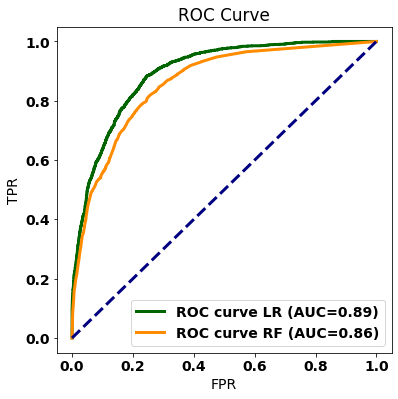

In [31]:
# Set parameters (change default matplotlib parameters)
plt.rcParams["figure.figsize"] = [6, 6]
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : 14}
plt.rc('font', **font)       # This sets the font of all items to the font specified by the kwargs object, font.
plt.figure()

# Give a title to the plot and label the x and y axis
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

# Plot the ROC curve for the Logistic Regression classifier
plt.plot(fpr1, tpr1, color='darkgreen', LW=3, label='ROC curve LR (AUC=%0.2f)' % AUC_LR)

# Plot the ROC curve for the Random Forest classifier
plt.plot(fpr2, tpr2, color='darkorange', LW=3, label='ROC curve RF (AUC=%0.2f)' % AUC_RF)

# Plot the reference line for a random classifier
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--')

# Select the legend's place in the plot
plt.legend(loc="lower right")
plt.show()

The ROC analysis shows that the ROC curves for both classifiers are quite close to the top left corner. This is also demonstrated by the high values of their AUC scores: 0.89 for Logistic Regression and 0.86 for Random Forest classifier. 

### Conclusions

The 'adult' dataset was cleaned and analysed, then were built two classification models for predicting a person's income. The 
models built were a Logistic Regression and a Random Forest classifiers. Looking at the metrics calculated for both models, it 
can be assesed the overall "fit" of each model. 
Comparing the Evaluation metrics, Confusion Matrix and ROC curve-AUC for both classifiers, it can be observed the following: 
- The F1 score is higher for the Logistic Regression classifiers than for the Random Forest classifier
- Confusion Matrix for both classifiers shows high values on the main diagonal for the True Positives and the True Negatives 
and small values for False Negatives and False Positives.
- The AUC for the Logistic Regression classifier has a value of 0.89, higher than for the Random Forest classifier (0.86). The 
ROC curves for both classifiers are close enough to the left corner.

It seems that the Logistic Regression classifier shows a slightly more robust accuracy measure overall and a better performance
than the Random Forest classifier for the selected model parameters. 